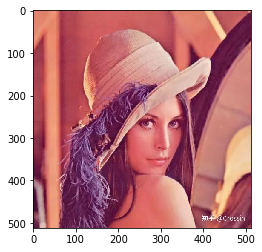

(512, 512, 3)
<class 'numpy.ndarray'>


In [59]:
from PIL import Image 
from matplotlib import pyplot as plt 
from matplotlib import image
import numpy as np
img = Image.open('lena.jpg')
img = np.asarray(img)#r將圖片先轉成array方便之後的處理
plt.imshow(img)
plt.show()
print(img.shape)
print(type(img))


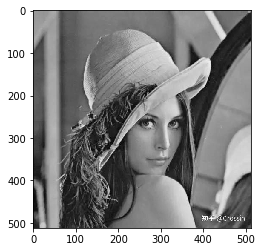

<class 'numpy.ndarray'>
(512, 512)


In [61]:
def rgb_to_grayscale(img):
    rgb = np.dot(img[:,:,0:3],[0.299,0.587,0.114]) #(0,0)的rgb分別對0.299 0.587 0.114做點積 = img[i,j]=img[i,j,0]*0.299+..
    return rgb 
gray = rgb_to_grayscale(img)
plt.imshow(gray)
plt.show()
print(type(gray))
print(gray.shape)

In [135]:
def historgram_data(img):
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    R=np.zeros(256).astype('int64')
    G=np.zeros(256).astype('int64')
    B=np.zeros(256).astype('int64')
    width = img.shape[0]
    height = img.shape[1]
    #統計每個顏色出現的次數
    for i in range(height):
        for j in range(width):
            R[r[i,j]]+=1
            G[g[i,j]]+=1
            B[b[i,j]]+=1
    return R,G,B

his_r,his_g,his_b = historgram_data(img)



In [159]:
def show_historgrm(his_r,his_g,his_b):
    fig,(axis_r,axis_g,axis_b) = plt.subplots(1,3,figsize=(17,5))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=0.5, hspace=None)
    axis_r.bar(np.arange(256),his_r,color='red',width=1)
    axis_g.bar(np.arange(256),his_g,color='green',width=1)
    axis_b.bar(np.arange(256),his_b,color='blue',width=1)
    plt.show()

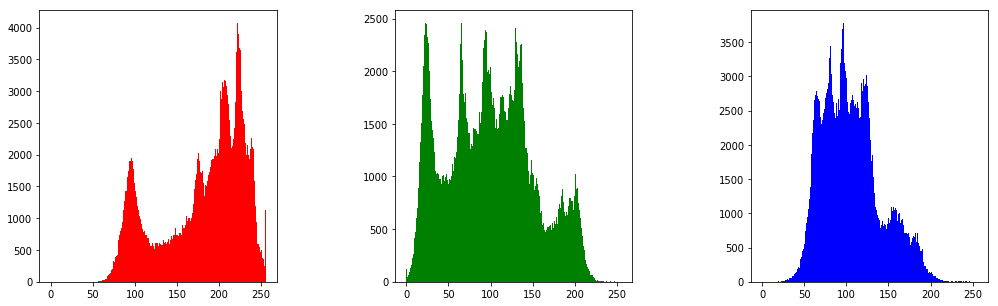

In [160]:
show_historgrm(his_r,his_g,his_b)

In [161]:
#直方圖等化 histogram equalization
#用到兩個numpy語法 
#np.cumsum(list) (累加 可以按照行或是列)
#np.bincount([1,2,3,4]) 回傳0~max(list)的元素各出現幾次，可以用來算r,g,b0~255各出現幾次
print(np.cumsum([1,2,3,4,5]))
print(np.bincount([1,2,3,2,2,2,2]))

[ 1  3  6 10 15]
[0 1 5 1]


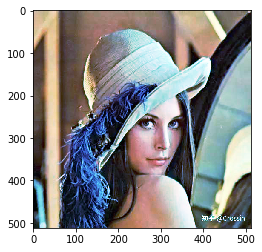

In [162]:
#先計算累積機率函數
#sigma(出現次數/m*n)
#https://zh.wikipedia.org/wiki/%E7%9B%B4%E6%96%B9%E5%9B%BE%E5%9D%87%E8%A1%A1%E5%8C%96
cdfr = (255*np.cumsum(his_r)/(img.shape[0]*img.shape[1])).astype('int64')
cdfg = (255*np.cumsum(his_g)/(img.shape[0]*img.shape[1])).astype('int64')
cdfb = (255*np.cumsum(his_b)/(img.shape[0]*img.shape[1])).astype('int64')

historgram_equ = np.zeros(img.shape).astype('uint8')

for i in range(img.shape[1]):
    for j in range(img.shape[0]):
        historgram_equ[i,j,0]=cdfr[img[i,j,0]]
        historgram_equ[i,j,1]=cdfg[img[i,j,1]]
        historgram_equ[i,j,2]=cdfb[img[i,j,2]]

historgram_equ = Image.fromarray(historgram_equ)
plt.imshow(historgram_equ)
plt.show()

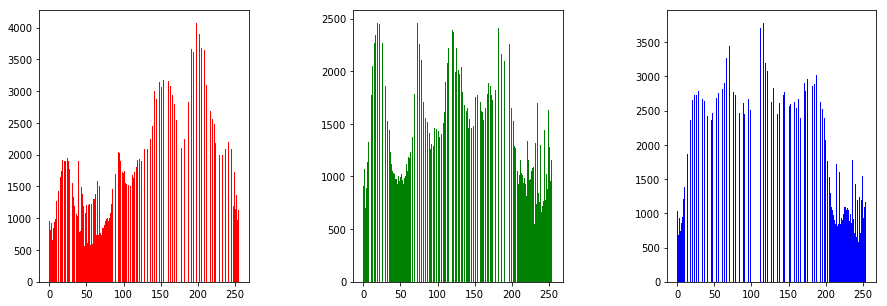

In [158]:
historgram_equ = np.asarray(historgram_equ)
e_r,e_g,e_b = historgram_data(historgram_equ)
show_historgrm(e_r,e_g,e_b)